Instructions

**When taking this exam, you agree to follow the Duke Honor Code.**

- This is a closed book exam. You can use the `help()` function, and the `?` prefix or suffix but are restricted to a SINGLE browser tab.
- All necessary imports are provided. You should not need to import any other packages.
- Answer all 5 questions.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import collections
import seaborn as sns
from functools import reduce
sns.set_context('notebook', font_scale=1.5)

**1**. 20 points

A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.

(Source: Project Euler Problem 4)

In [2]:
res = []
for i in range(999, 1, -1):
    for j in range(999, 99, -1):
        n = i*j
        if str(i*j) == str(i*j)[::-1]:
            res.append(n)
max(res)

906609

**2**. 20 points

Count the number of each unique word longer than 3 characters in the nursery rhyme given, ignoring case and removing punctuation.

```text
Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall;
All the king's horses and all the king's men
Couldn't put Humpty together again.
```

In [3]:
s = '''Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall;
All the king's horses and all the king's men
Couldn't put Humpty together again.'''

In [4]:
collections.Counter(_ for _ in s.lower().
                    translate(str.maketrans('', '', string.punctuation)).
                    split() if len(_) > 3)

Counter({'humpty': 3,
         'dumpty': 2,
         'wall': 1,
         'great': 1,
         'fall': 1,
         'kings': 2,
         'horses': 1,
         'couldnt': 1,
         'together': 1,
         'again': 1})

**3**. 20 points

Create a DataFrame containing the standardized data for each row feature - that is, every row has mean 0 and standardized deviation 1. The DataFrame should have the same row and column names as the original.

In [5]:
df = pd.DataFrame(
    dict(ann=(23,67,1.6), bob=(24,92,1.7), dan=(30,89,1.8)), 
    index=['age', 'wt', 'ht'])

In [6]:
df

,ann,bob,dan
age,23.0,24.0,30.0
wt,67.0,92.0,89.0
ht,1.6,1.7,1.8


In [7]:
(df - df.mean(axis=1)[:, None])/df.std(axis=1)[:, None]

,ann,bob,dan
age,-0.704361,-0.440225,1.144586
wt,-1.147708,0.683741,0.463967
ht,-1.000000,0.000000,1.000000


**Alternative**

In [8]:
df.transform(lambda x: (x - x.mean())/x.std(), axis=1)

,ann,bob,dan
age,-0.704361,-0.440225,1.144586
wt,-1.147708,0.683741,0.463967
ht,-1.000000,0.000000,1.000000


**4**. 20 points

Download the `mtcars` data set as a Dataframe from https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv

and create the following panel of strip plots

![](./mtcars.png)

In [9]:
url = 'https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv'
mtcars = pd.read_csv(url)

In [10]:
df = mtcars[['carb', 'mpg', 'hp', 'wt']]

In [11]:
df = pd.melt(df, id_vars='carb')

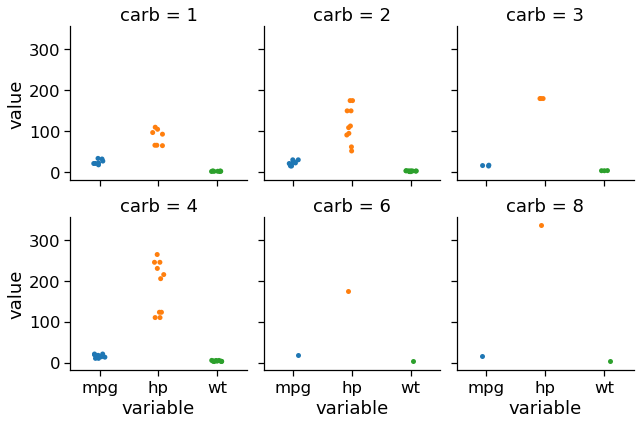

In [12]:
g = sns.catplot(data = df,
            x='variable',
            y='value',
            col='carb',
            col_wrap=3, 
            kind='strip',
            s=5, 
            height=3)
g.savefig('mtcars.png')

**5**. 20 points

Given 

```
y = [ 1.70222116,  1.95783341, -0.51612387, -2.06639513, -2.41302321,
     -0.73439023,  1.84515596,  11.58990399, -1.68093127, -1.31909487]
y_pred = [ 1., 0.54030231, -0.41614684, -0.9899925 , -0.65364362,
          0.28366219,  0.96017029, 0.75390225, -0.14550003, -0.91113026]
```

find the residual sum of squares (RSS) - i.e. the sum of squared difference between `y` and `y_pred` , excluding any residual whose absolute value is greater or equal to 3. The residual or error is the difference between `y` and `y_pred`. Use only anonymous functions and the higher order functions map, reduce and filter to do so.

Do not use any of the following

- for loops
- comprehensions or generator expressions
- the sum function
- numpy

In [13]:
y = [ 1.70222116,  1.95783341, -0.51612387, -2.06639513, -2.41302321,
     -0.73439023,  1.84515596,  11.58990399, -1.68093127, -1.31909487]
y_pred = [ 1., 0.54030231, -0.41614684, -0.9899925 , -0.65364362,
          0.28366219,  0.96017029, 0.75390225, -0.14550003, -0.91113026]

In [14]:
reduce(lambda x, y: x+y,
       map(lambda x: x**2,
       filter(lambda x: x < 3, 
              map(lambda x, y: abs(x - y), y, y_pred))))

11.110178128879657